Mustafa Bayrak 150210339

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Question 2

Define function

In [203]:
def f(x):
    result = (x)*(x-3)*(x-3)*(x-9)
    return result

Define derivative function

In [204]:
def f_d(x):
    result = (x-3)* ((4*x)**2 - 33*x + 27)
    return result

Define quadratic fit search function

In [205]:
def quadratic_fit_search(f,a,b,c,n,tol=1e-6):
    points = []
    values = []
    y_a,y_b,y_c = f(a),f(b),f(c)
    for i in range(n):
        x = 0.5* (y_a*(b**2-c**2)+y_b*(c**2 -a**2)+y_c*(a**2-b**2))/ \
        (y_a*(b-c)+y_b*c-a + y_c*(a-b))
        y_x = f(x)
        if x >b:
            if y_x > y_b:
                c,y_c = x,y_x
            else:
                a,y_a,b,y_b= b,y_b,x,y_x
        elif x<b:
            if y_x > y_b:
                a,y_a = x,y_x
            else:
                c,y_c,b,y_b = b,y_b,x,y_x
        i +=1
        if i <= 3:
            points.append((a+c)/2)
            values.append(f((a+c)/2))
            print("Iteration {}: ({:.2f}, {:.2f})".format(i, (a+c)/2, f((a+c)/2)))
        if abs(c-a) <= tol:
            return x2
    return (a+c)/2,points,values

Define secant method function

In [206]:
def secant_method(f,val_func, x0, x1, eps, max_iter=1000):
    points = []
    values = []
    for i in range(max_iter):
        i+=1
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(f(x2)) <= eps:
            return x2,points,values
        if i <= 3:
            points.append(x2)
            values.append(val_func(x2))
            print("Iteration {}: ({:.2f}, {:.2f})".format(i, x2, val_func(x2)))
        x0 = x1
        x1 = x2
    return x2,points,values

Define function to plot 2D

In [207]:
def plot_function(x,y):
    plt.plot(x, y)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('2D Graph')
    plt.show()

Plot function

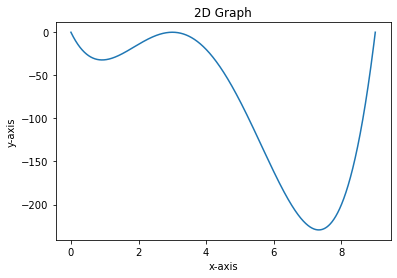

In [208]:
x1 = np.linspace(0, 9, 10000)
y= f(x1)
plot_function(x1,y)

Define the starting points and parameters

In [209]:
a = 5
c = 15
epsilon = 1e-6
max_iter= 10000

Print iterations of quadratic fit search function

In [210]:
min_x,quad_points,quad_values = quadratic_fit_search(f,a,(a+c)/2,c, 10000)

Iteration 1: (7.50, -227.81)
Iteration 2: (7.20, -228.68)
Iteration 3: (7.36, -229.46)


Print iterations of secant method

In [211]:
min_x,sec_points,sec_values = secant_method(f_d,f,a,c,epsilon,10000)

Iteration 1: (4.86, -69.51)
Iteration 2: (4.73, -60.76)
Iteration 3: (3.86, -14.56)


Function to show iterations of quadratic fit search function

In [212]:
def plot_quadratic(x,y,x_points,y_points):
    plt.plot(x, y)
    plt.scatter(x_points,y_points,c="r")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('2D Graph')
    plt.show()

Function to show iterations of secant method

In [213]:
def plot_secant(x,y,x_points,y_points):
    plt.plot(x, y)
    plt.scatter(x_points,y_points,c="r")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('2D Graph')
    plt.show()

Plot iterations of quadratic fit search function

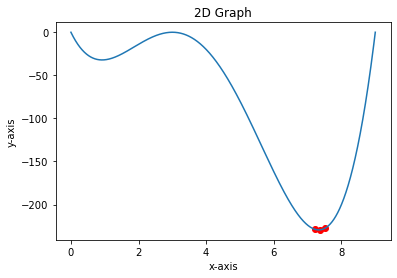

In [214]:
plot_quadratic(x1,y,quad_points,quad_values)

Plot iterations of secant method

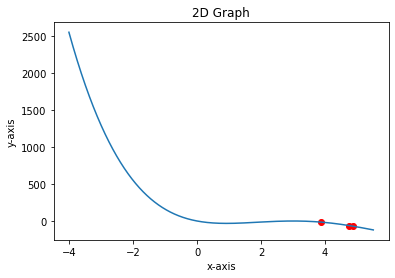

In [215]:
x2 = np.linspace(-4, 5.5, 10000)
y= f(x2)
plot_secant(x2,y,sec_points,sec_values)

Secant method finds roots of functions. Let say we set our unimodal interval to find a minimum point, then we should find the root of derivative function. While doing this, we may converge to another root, which corresponds to a maximum point. Another potential fail is, function may be non differentiable in some points. Another possibility is we may be so close to root but then we can diverge from that root. Secant method cannot always converge to root.

In my situtation, secant method fails because it converges to another root of derivative which is 3.

Question 3

Define function

In [216]:
def f(x,y):
    return x**2 + y**2 + x*y + 3*x + 4*y

In [217]:
def plot_f(f,x_list,y_list):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a meshgrid of x and y values
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)

    Z = f(X, Y)

    ax.plot_surface(X, Y, Z,color="gray")
    z_scatter = [f(x, y) for x, y in zip(x_list, y_list)]
    ax.scatter(x_list, y_list, z_scatter, c='red', s=50)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title('3D Plot of f(x,y)')

    plt.show()

Plot contour

In [218]:
def plot_contour(f,x_list,y_list):
    # Define the x and y values
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    plt.contourf(X, Y, Z)
    plt.colorbar()
    z_scatter = [f(x, y) for x, y in zip(x_list, y_list)]
    plt.scatter(x_list, y_list,c='red', s=50)

    # Show the plot
    plt.show()

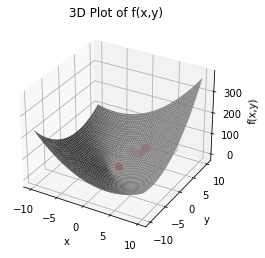

In [219]:
x_list = [0,3,2.5,2.0775]
y_list = [0,4,3.45,2.98]
plot_f(f,x_list,y_list)

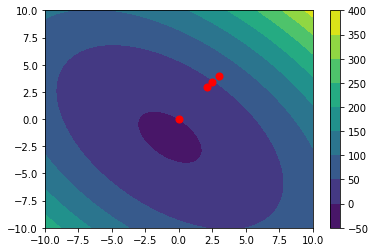

In [220]:
plot_contour(f,x_list,y_list)

Question 4

Define function

In [221]:
def f(x1,x2):
    result = (x1)*(x2-3)*(x1-3)*(x2-9)
    return result

Gradient function

In [222]:
def gradient(x1, x2):
    df_dx1 = (2*x1-3) * (x2 -3) * (x2-9)
    df_dx2 = (2*x2 - 12) * (x1) * (x1-3)
    return np.array([df_dx1, df_dx2])

Backtracking line search

In [223]:
def backtracking_line_search(f,x, grad, alpha, beta):
    s = alpha
    while f(*(x + s * (-grad))) > f(*x) - beta * s * np.dot(grad, grad):
        s *= beta
    return s

Secant method

In [224]:
def secant_line_search(f, x, grad, alpha_init, epsilon):
    alpha_prev = 0
    alpha = alpha_init
    f_prev = f(*x)
    df_prev = np.dot(grad, grad)

    while abs(alpha - alpha_prev) > epsilon:
        x_new = x - alpha * grad
        f_new = f(*x_new)
        df = np.dot(grad, gradient(*x_new))
        alpha_new = alpha - (alpha - alpha_prev) * df / (df - df_prev)

        alpha_prev = alpha
        alpha = alpha_new
        f_prev = f_new
        df_prev = df

    return alpha

Gradient descent function

In [225]:
def gradient_descent(f, gradient, start_point, line_search, alpha, beta, epsilon, max_iter):
    x = start_point
    x_history = [x]
    f_history = [f(*x)]
    iter_num = 0
    
    while iter_num < max_iter:
        grad = gradient(*x)
        if np.linalg.norm(grad) < epsilon:
            break
        
        if line_search == 'backtracking':
            alpha = backtracking_line_search(f, x, grad, alpha, beta)
        elif line_search == "secant":
            alpha = secant_line_search(f, x, grad, alpha, epsilon)
            
        x = x - alpha * grad
        x_history.append(x)
        f_history.append(f(*x))
        iter_num += 1
    x_history = np.array(x_history)
    value_history = np.array(f_history)
    return x_history,value_history

Plot optimization path

In [226]:
def plot_optimization_path(f, x_history,f_history):
    # Create a 3D plot of the function surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, -500, 100)
    x1, x2 = np.meshgrid(x1, x2)
    z = f(x1, x2)
    ax.plot_surface(x1, x2, z, cmap='coolwarm', alpha=0.8)

    num_iterations = len(x_history)
    for i in range(num_iterations):
        x = x_history[i]
        f_val = f_history[i]
        ax.scatter(x[0], x[1], f_val, c="yellow", s=50)
        if i < num_iterations - 1:
            next_x = x_history[i+1]
            ax.plot([x[0], next_x[0]], [x[1], next_x[1]], [f_val, f(*next_x)], color="pink", linewidth=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    plt.title('Optimization path')
    plt.show()

Plot contour

In [227]:
def plot_contour_q4(f, x_history, f_history):
    x1_vals = np.linspace(-500, 500, 1000)
    x2_vals = np.linspace(-500, 500, 1000)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
    f_vals = f(x1_grid, x2_grid)
    plt.contour(x1_grid, x2_grid, f_vals, 10)
    plt.scatter(x_history[:, 0], x_history[:, 1], c=f_history, cmap='coolwarm', alpha=0.7, s=20)
    plt.colorbar(label='f(x1, x2)')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour plot of f(x1, x2) with iterations')
    plt.show()

Define the starting points and parameters

In [228]:
start_point = np.array([1, 1])
alpha = 1e-3
beta = 0.5
epsilon = 1e-6
max_iter = 1000

Plots steepest descent with secant method

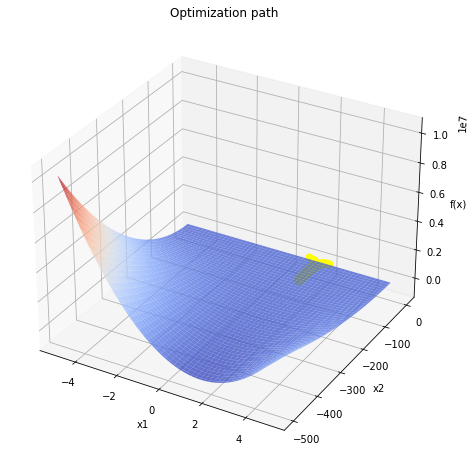

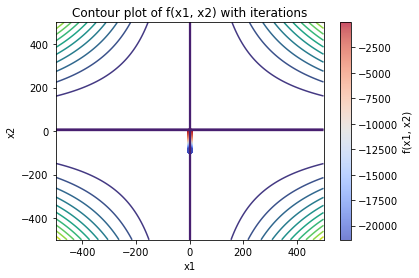

In [229]:
x_history, f_history = gradient_descent(f, gradient, start_point, line_search='secant',\
                                        alpha=alpha,beta=beta, epsilon=epsilon, max_iter=max_iter)
plot_optimization_path(f, x_history, f_history)
plot_contour_q4(f,x_history,f_history)

Plots of steepest descent with backtracking line search

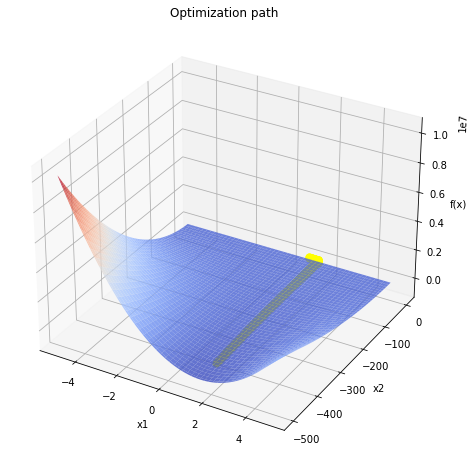

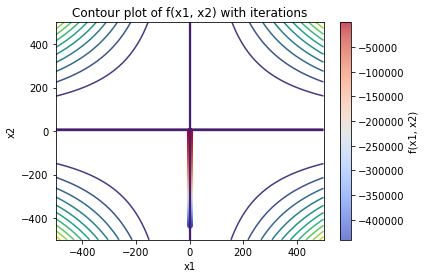

In [230]:
# plot the function and run steepest descent with backtracking line search
x_history, f_history = gradient_descent(f, gradient, start_point, line_search='backtracking',\
                                        alpha=alpha,beta=beta, epsilon=epsilon, max_iter=max_iter)
plot_optimization_path(f, x_history, f_history)
plot_contour_q4(f,x_history,f_history)